## **Titanic - Machine Learning from Disaster**

### machine learning project

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Data exploration
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### clean and descover the data

In [63]:
# Data cleaning
# Handling missing values
imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

In [64]:
# Fill missing 'Embarked' values with the most frequent value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14668\2356034452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14668\2356034452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [65]:
# Fill missing 'Fare' values in test data
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14668\3903254480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [66]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [67]:
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

In [76]:
# Debug: Check if 'Embarked' column is present after encoding
print("Columns after encoding:")
print(train_data.columns)
print(test_data.columns)

Columns after encoding:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'Title', 'IsAlone'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'Title',
       'IsAlone'],
      dtype='object')


### Data visualization

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Data preprocessing function
def preprocess_data(data):
    # Fill missing values in 'Age' if it exists
    if 'Age' in data.columns:
        data['Age'].fillna(data['Age'].median(), inplace=True)
        
    # Fill missing values in 'Embarked' if it exists
    if 'Embarked' in data.columns:
        data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
        
    # Fill missing values in 'Fare' if it exists
    if 'Fare' in data.columns:
        data['Fare'].fillna(data['Fare'].median(), inplace=True)
        
    # Drop 'Cabin' column if it exists
    if 'Cabin' in data.columns:
        data.drop(['Cabin'], axis=1, inplace=True)
        
    # Convert 'Sex' to numeric if it exists
    if 'Sex' in data.columns:
        data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
        
    # Convert 'Embarked' to dummy variables if it exists
    if 'Embarked' in data.columns:
        data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
        
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Check for missing values and data types
print(train_data.isnull().sum())
print(train_data.dtypes)

# Check the first few rows of the data
print(train_data.head())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Hei

C:\Users\Acer\AppData\Local\Temp\ipykernel_14668\49961959.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14668\49961959.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

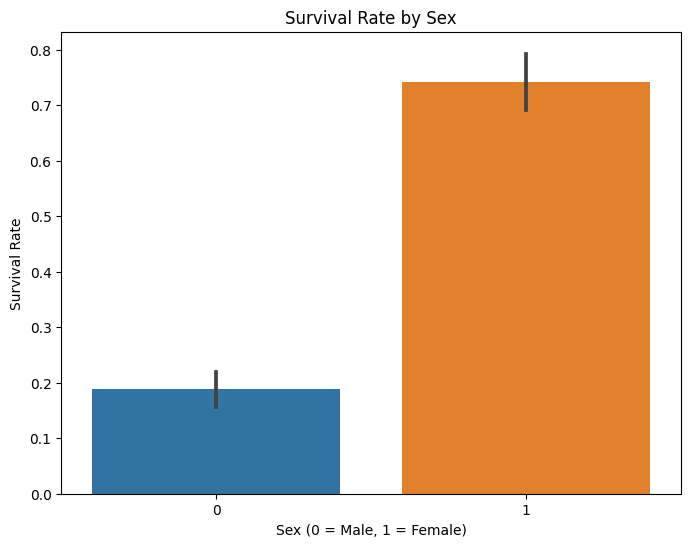

In [44]:
# Visualize Survival Rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

### Insight

- One bar representing males (0) and their average survival rate.

- One bar representing females (1) and their average survival rate.

The height of the bars indicates the proportion of survivors within each sex category, providing a clear visual comparison.

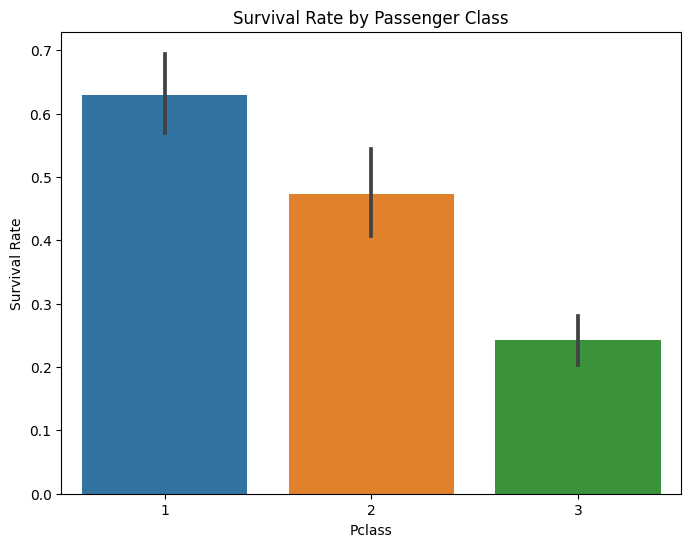

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()


### Insight:

- Passengers in the 1st class have the highest survival rate, followed by those in the 2nd class, with the 3rd class having the lowest survival rate.

- The survival rate for 1st class passengers is above 60%, for 2nd class around 45%, and for 3rd class below 25%.

- Passenger class is a significant factor in survival.

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


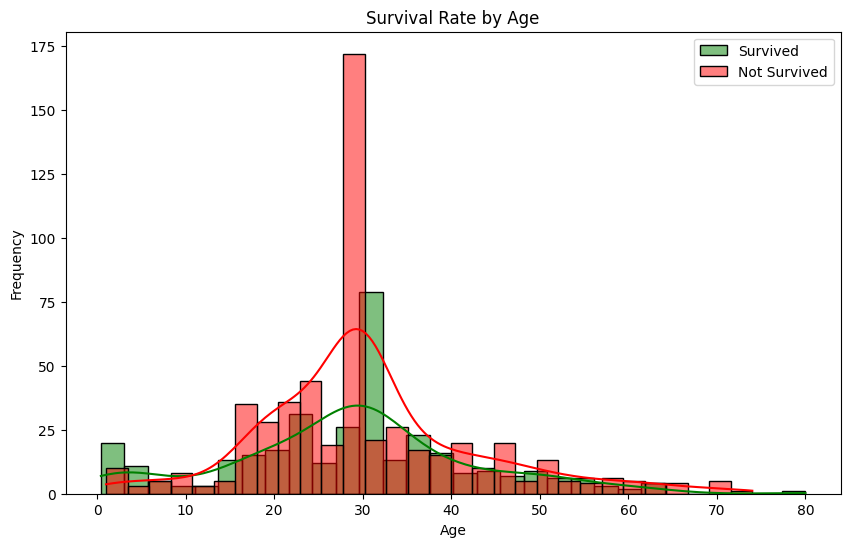

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Insight:

- Younger passengers (especially children) have a higher survival rate.

- There is a noticeable difference in the age distribution of those who survived and those who did not.

- The survival rate decreases with increasing age, but there are peaks and troughs indicating that age alone is not a definitive predictor of survival.

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


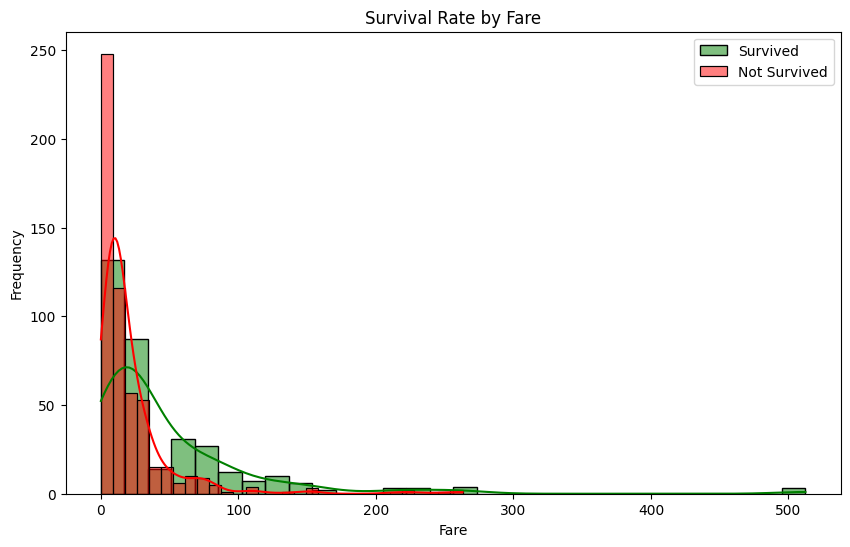

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Fare'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Fare'], bins=30, kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Insight:

- Passengers who paid higher fares have a higher survival rate.

- There is a clear separation in fare distribution between those who survived and those who did not.

- This suggests that fare (which is correlated with passenger class) is a significant factor in survival.

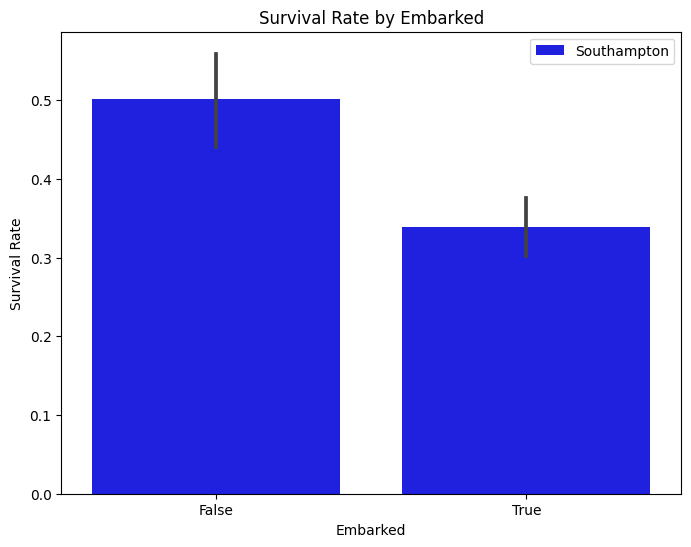

In [52]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked_S', y='Survived', data=train_data, label='Southampton', color='blue')
# sns.barplot(x='Embarked_C', y='Survived', data=train_data, label='Cherbourg', color='green')
# sns.barplot(x='Embarked_Q', y='Survived', data=train_data, label='Queenstown', color='red')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()

### Insight:

- Passengers who embarked from Cherbourg (C) have the highest survival rate, followed by those from Queenstown (Q), and the lowest survival rate is for those from Southampton (S).

- This suggests that the port of embarkation has some influence on survival, possibly related to socioeconomic factors or the class of the ticket purchased.

### **Machine Learning Model - (LogisticRegression,RandomForest)**

### Feature Engineering

- Create new features if relevant (e.g., family size by combining SibSp and Parch).

- Normalize or scale features if needed.

In [78]:
# Feature engineering
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

In [79]:
# Title extraction
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Simplify titles
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

In [80]:
# Convert titles to numeric
train_data['Title'] = label_encoder.fit_transform(train_data['Title'])
test_data['Title'] = label_encoder.transform(test_data['Title'])

# IsAlone feature
train_data['IsAlone'] = (train_data['FamilySize'] == 0).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 0).astype(int)


In [82]:
# Debug: Check final columns before model selection
print("Final columns in train data:")
print(train_data.columns)
print("Final columns in test data:")
print(test_data.columns)

Final columns in train data:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'Title', 'IsAlone'],
      dtype='object')
Final columns in test data:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'Title',
       'IsAlone'],
      dtype='object')


In [87]:
# Select features for the model
features = ['Pclass', 'Sex', 'Age', 'Fare','Embarked_Q', 'Embarked_S', 'FamilySize','Title', 'IsAlone']
X = train_data[features]
y = train_data['Survived']
X_test = test_data[features]

### Model Building

- Select appropriate machine learning algorithms (LogisticRegression) as example.

- Train the model on the training data.

- Validate the model using cross-validation or a validation set.

In [88]:
# Model building
# Random Forest with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [89]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [92]:
# Evaluate the model on the validation set
val_predictions = best_rf.predict(X)
accuracy = accuracy_score(y, val_predictions)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8922558922558923


In [90]:
# Ensembling
# Train other models
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X, y)

lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(X, y)

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [93]:
# Make predictions on the validation set
rf_val_pred = best_rf.predict(X)
gb_val_pred = gb.predict(X)
lr_val_pred = lr.predict(X)
# Combine predictions using majority voting
final_val_pred = np.array([np.bincount([rf_val_pred[i], gb_val_pred[i], lr_val_pred[i]]).argmax() for i in range(len(rf_val_pred))])

In [98]:
# Evaluate the ensemble model on the validation set
ensemble_accuracy = accuracy_score(y, final_val_pred)
print("Ensemble Validation Accuracy:", ensemble_accuracy*100)

Ensemble Validation Accuracy: 89.00112233445566


In [95]:
# Make predictions on the test set
rf_pred = best_rf.predict(X_test)
gb_pred = gb.predict(X_test)
lr_pred = lr.predict(X_test)

In [96]:
# Combine predictions using majority voting
final_test_pred = np.array([np.bincount([rf_pred[i], gb_pred[i], lr_pred[i]]).argmax() for i in range(len(rf_pred))])

### Saving the changes in submission file

In [97]:
# Prepare the submission file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": final_test_pred
})
submission.to_csv('submission.csv', index=False)